In [111]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics

In [89]:
iris = load_iris()

In [90]:
X = iris.data
y = iris.target

In [101]:
class kMeans:
    def __init__(self, k, max_iterations = 100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        random_choice = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_choice]
        for _ in range(self.max_iterations):
            distances = cdist(X, self.centroids, metric='euclidean')
            labels = np.argmin(distances, axis=1)
            for j in range(self.k):
                self.centroids[j] = np.mean(X[labels==j], axis = 0)
                
    def predict(self, X):
        distances = cdist(X, self.centroids, metric='euclidean')
        return np.argmin(distances, axis=1)

In [102]:
model = kMeans(3)

In [103]:
model.fit(X)

In [104]:
y_pred = model.predict(X)

<AxesSubplot: >

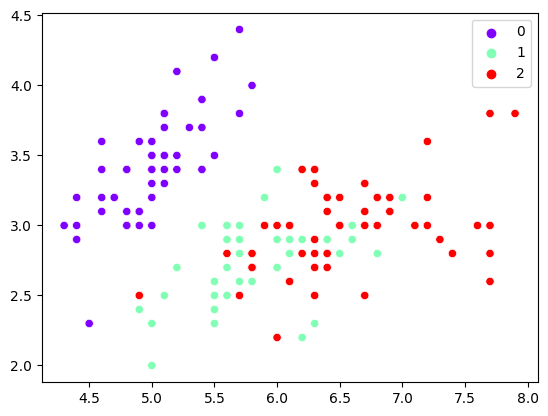

In [106]:
sns.scatterplot(x = X[:,0], y = X[:, 1], hue = y, palette='rainbow')

<AxesSubplot: >

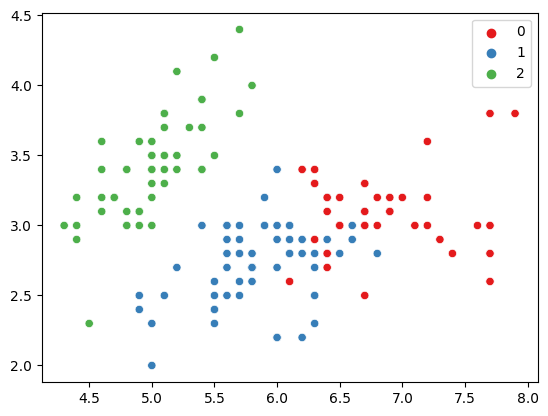

In [108]:
sns.scatterplot(x = X[:,0], y = X[:, 1], hue = y_pred, palette='Set1')

In [109]:
def elbow(X):
    wcss = []
    for i in range(1, 11):
        model = KMeans(i)
        model.fit(X)
        wcss.append(model.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title("Elbow Method")
    plt.xlabel("Clusters")
    plt.ylabel("WCSS")
    plt.show()

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

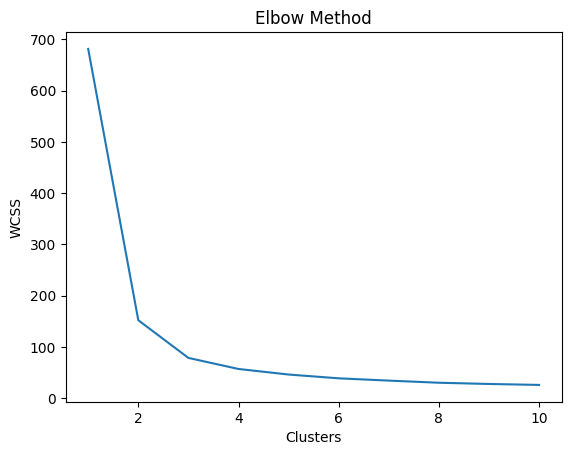

In [110]:
elbow(X)

In [131]:
def silhouette(X):
    silhouette_scores = []
    for i in range(2, 11):
        model = kMeans(i)
        model.fit(X)
        labels = model.predict(X)
        silhouette_scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    plt.plot(range(2, 11), silhouette_scores)
    plt.title("Silhouette Method")
    plt.xlabel("Clusters")
    plt.ylabel("Silhouette scores")
    plt.show()

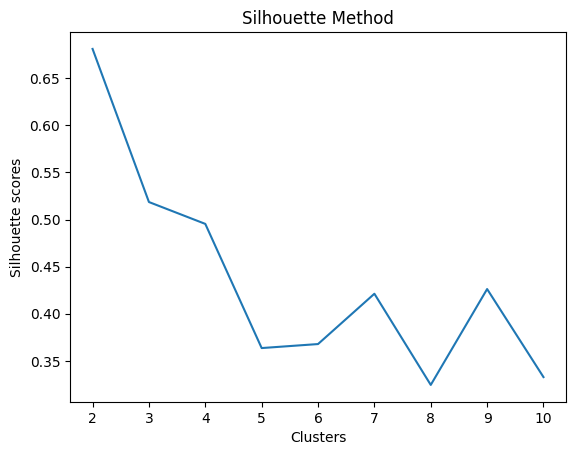

In [132]:
silhouette(X)